In [1]:
#Connect colab with gdrive to access and dump files 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing pickle session corresponding to '01_Data_Adquisition_and_Preprocessing.ipynb'
import dill
dill.load_session('/content/drive/MyDrive/session.pkl')

4.1. Adding new pic and transfer learning for feature extraction (labelling)

In cells below we are going to import images which are target to be tested in our model using transfer learning from our model.

In [ ]:
#Firstly, let's create a folder in gdrive to store test pics 
! mkdir '/content/drive/MyDrive/Images_sample_test'

In [2]:
#Using files module, we are going to upload pics of interest.
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving whiteblckbg1.png to whiteblckbg1.png


In [4]:
sample_img_path = '/content/drive/MyDrive/Images_sample_test/whiteblckbg1.png'

In [5]:
img_dim = (28,28,1)

In [6]:
#Imports of keras preprocessing modules and functions to load and transofrm images to array
from keras.preprocessing.image import load_img, img_to_array, array_to_img

In [7]:
sample_img = load_img(sample_img_path, target_size=img_dim)
sample_img_tensor = img_to_array(sample_img)

4.2. Preprocessing of input image 

Accordingly with imageset propieties, we will transform input image to be able to transfer learing to this new image.

It is necessary to resize image according to the dimensions of train and test dataset, that is to say, 28x28px and in this case we will decide to reshape to gray channel also.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#sample_img_tensor = np.expand_dims(sample_img_tensor, axis=0)

In [10]:
sample_img_tensor /= 255
sample_img_tensor.shape

(28, 28, 3)

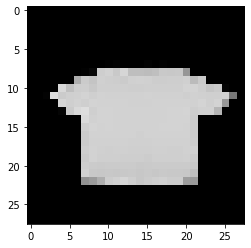

In [11]:
plt.imshow(sample_img_tensor)

In [13]:
import cv2

sample_img_tensor = cv2.cvtColor(sample_img_tensor,cv2.COLOR_RGB2GRAY)

In [14]:
sample_img_tensor = np.reshape(sample_img_tensor, (1,28,28,1))


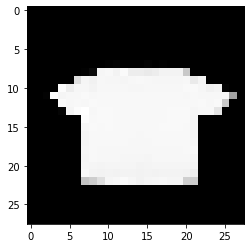

In [15]:
plt.imshow(sample_img_tensor.reshape(28,28), cmap='Greys_r')

4.3. Feature extraction 

Down below we are going to test predictions for the entered image. In this case model_4 is loaded in a new variable, and we will use the sample image tensor preprocessed above.

In [16]:
from keras import  models
model_4_bis = models.load_model('/content/drive/MyDrive/saved_model/model_4.h5')

In [19]:
#For prediction we use .predict method of the deep learning model applied for the sample image tensor 
image_prediction = np.argmax(model_4_bis.predict(sample_img_tensor))
categ_df.Description[image_prediction]

'T-shirt/top'

In [20]:
model_4_bis.predict(sample_img_tensor)

array([[0.19041178, 0.04882303, 0.00501373, 0.17280722, 0.03604072,
        0.13832459, 0.00621587, 0.00589088, 0.0354833 , 0.00476354]],
      dtype=float32)

In [ ]:
predictions = model_4_bis.predict(Xtest)

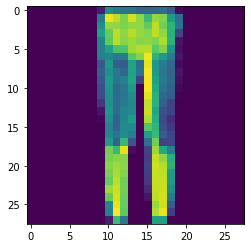

In [ ]:
plt.imshow(Xtest[].reshape(28,28))

In [ ]:
Xtrain[0].shape

(28, 28, 1)

4.4. Prediction Plot function

In order to show similar items that matches with our sample image, which is the main feature of the image search service, let's declare a function which explore our predictions array for the Test set and plots n predictions which correspond with sample image label predicted.

In [21]:
def similar_predict_plot(model,img_set,sample_image):
  
  sample_prediction = model.predict(sample_image)
  prediction = model.predict(img_set)
  
  n_cols =5 
  #loop which compares and collects predictions of labels that matches with prediction of sample image
  labels = []
  for i in range(n_cols):
    for j in range(0, len(img_set)):
        if np.argmax(sample_prediction) == np.argmax(prediction[j]):
          labels.append(j)
          i+=1
  
  
                
  f, ax = plt.subplots(1, 5, figsize=(10,10))
  for i in range(5):
    ax[i].imshow(img_set[labels[i]].reshape(28,28))       

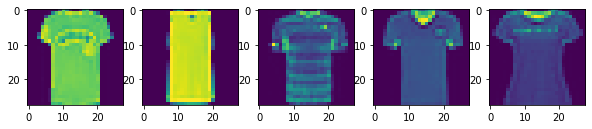

In [23]:
similar_predict_plot(model_4_bis, Xtest, sample_img_tensor)